In [1]:
import torch
from data import Data
from train import train
from LSTM import LSTM
import matplotlib.pyplot as plt



In [2]:

data = Data()
model = LSTM(len(data.vocab), 128, len(data.categories))
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.005)
losses = []



Arabic
Chinese
Czech
Dutch
English
French
German
Greek
Irish
Italian
Japanese
Korean
Polish
Portuguese
Russian
Scottish
Spanish
Vietnamese


In [3]:
train(
    model,
    criterion,
    optimizer,
    epochs=100000,
    data=data,
    losses=losses
)

Actual: Japanese | Predicted: Korean ✗
Iterations: 500 | loss: 2.898632333278656
Actual: French | Predicted: Korean ✗
Iterations: 1000 | loss: 2.9238424592018126
Actual: Vietnamese | Predicted: Korean ✗
Iterations: 1500 | loss: 2.9395461463928223
Actual: Japanese | Predicted: Korean ✗
Iterations: 2000 | loss: 2.9275461707115173
Actual: Arabic | Predicted: Korean ✗
Iterations: 2500 | loss: 2.937546143531799
Actual: Dutch | Predicted: Korean ✗
Iterations: 3000 | loss: 2.911546138763428
Actual: English | Predicted: Korean ✗
Iterations: 3500 | loss: 2.903546182394028
Actual: Greek | Predicted: Korean ✗
Iterations: 4000 | loss: 2.9175461537837983
Actual: Spanish | Predicted: Korean ✗
Iterations: 4500 | loss: 2.917546190738678
Actual: Irish | Predicted: Korean ✗
Iterations: 5000 | loss: 2.9235461599826813
Actual: Italian | Predicted: Korean ✗
Iterations: 5500 | loss: 2.9175461983680724
Actual: Polish | Predicted: Korean ✗
Iterations: 6000 | loss: 2.9355462214946746
Actual: Irish | Predicted:

KeyboardInterrupt: 

In [ ]:
def predict(model, input, data):
    tensor = data.word2tensor(input)
    hidden_state = model.init_hidden()

    for ch in range(tensor.shape[0]):
        output, hidden_state = model(tensor[ch], hidden_state)

    category = data.tensor2category(torch.tensor([torch.argmax(output)], dtype=torch.long))
    return category

# predict(model, "Luka Modric\n", data)


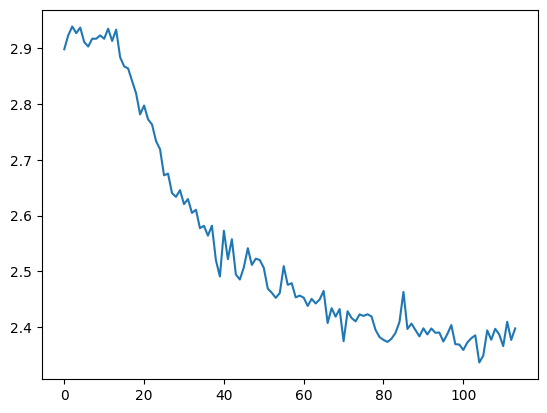

In [4]:
plt.plot(range(len(losses)), losses)

In [ ]:
while True:
    inp = input("> ")
    if inp.lower() == "quit":
        break

    category = predict(model, f"{inp}\n", data)
    print(category)

Arabic
